**Basic Libraries being imported**

In [1]:
import cupy as cp
import cudf as cd
import pandas as pd
import numpy as np
import xgboost as xgb
import matplotlib.pyplot as plt
import seaborn as sb

**Installing gdown to access dataset from drive**

In [2]:
!pip install gdown

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for gdown: filename=gdown-4.4.0-py3-none-any.whl size=14775 sha256=ce53c724023bb7dbbd9da0826d3242e5f3c48dd8f02aa6267674aa2b4801090c
  Stored in directory: /root/.cache/pip/wheels/fb/c3/0e/c4d8ff8bfcb0461afff199471449f642179b74968c15b7a69c
Successfully built gdown


**Downloading Dataset files from drive to local kaggle working directory**

In [3]:
import gdown
url = 'https://drive.google.com/uc?id=1Tk5OoYCf78nzrIdHmnCbFuEi1Ic67QvD'
url1 = 'https://drive.google.com/uc?id=1zhTgE01tUvcE_GcHCna9ajl-UfVFhZvY'
output = 'train1.csv'
output1 = 'test1.csv'
gdown.download(url, output, quiet=False)
gdown.download(url1, output1, quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1Tk5OoYCf78nzrIdHmnCbFuEi1Ic67QvD
To: /kaggle/working/train1.csv
100%|██████████| 67.4M/67.4M [00:00<00:00, 96.8MB/s]
Downloading...
From: https://drive.google.com/uc?id=1zhTgE01tUvcE_GcHCna9ajl-UfVFhZvY
To: /kaggle/working/test1.csv
100%|██████████| 32.2M/32.2M [00:00<00:00, 64.8MB/s]


'test1.csv'

**Reading the dataset as csv files through pandas for Preprocessing**

In [4]:
train=pd.read_csv('/kaggle/working/train1.csv')
test=pd.read_csv('/kaggle/working/test1.csv')

In [5]:
train.head()

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery,id
0,Portugal,This is a fine rich balanced wine. It has ripe...,Vila Santa Reserva,88.870874,20.0,Alentejano,NaN,NaN,NaN,NaN,NaN,PORTUGUESE RED,J. Portugal Ramos,32027
1,France,"A solid, chunky wine, with a structure that is...",NaN,88.041695,28.0,Bordeaux,Lalande de Pomerol,NaN,NaN,NaN,NaN,BORDEAUX-STYLE RED BLEND,Château Tour Grand Colombier,71079
2,France,"This is powerful and concentrated, with the hi...",NaN,94.085021,130.0,Bordeaux,Saint-Émilion,NaN,NaN,NaN,NaN,BORDEAUX-STYLE RED BLEND,Château Figeac,32440
3,US,"Rich, ripe and oaky, this Petite Sirah charms ...",Thompson Vineyard,89.869797,34.0,California,Santa Barbara County,Central Coast,NaN,NaN,Jaffurs 2010 Thompson Vineyard Petite Sirah (S...,PETITE SIRAH,Jaffurs,124405
4,US,This wine is a unique in the state blend and f...,McKinley Springs Vineyard,89.017651,24.0,Washington,Horse Heaven Hills,Columbia Valley,Sean P. Sullivan,@wawinereport,Syncline 2016 McKinley Springs Vineyard Rosé (...,ROSé,Syncline,33649


In [6]:
test.head()

,index,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery,id
0,41855,US,"Sweet new oak stands out, giving this Cabernet...",3D,95.036469,NaN,California,St. Helena,Napa,NaN,NaN,Salvestrin 2007 3D Cabernet Sauvignon (St. Hel...,CABERNET SAUVIGNON,Salvestrin,0
1,10328,France,Charming raspberry aromas intertwine with scen...,Heluicum,90.966405,NaN,Rhône Valley,Collines Rhôdaniennes,NaN,NaN,NaN,NaN,SYRAH,Les Vins de Vienne,1
2,60094,US,"Ripe blackberry, leather and soy show on the n...",Estate,88.964358,NaN,California,Santa Ynez Valley,Central Coast,Matt Kettmann,@mattkettmann,Brave & Maiden 2013 Estate Cabernet Franc (San...,CABERNET FRANC,Brave & Maiden,2
3,48333,US,White flowers and wild anise give this a crisp...,NaN,89.960356,NaN,California,Sonoma Coast,Sonoma,Virginie Boone,@vboone,Les Voleurs 2013 Chardonnay (Sonoma Coast),CHARDONNAY,Les Voleurs,3
4,14498,US,Pinot Gris has been making inroads in Washingt...,NaN,88.075501,NaN,Washington,Columbia Valley (WA),Columbia Valley,Sean P. Sullivan,@wawinereport,Chateau Ste. Michelle 2015 Pinot Gris (Columbi...,PINOT GRIS,Chateau Ste. Michelle,4


**Setting id as data index**

In [7]:
train.set_index('id',inplace=True)
test.set_index('id',inplace=True)

**Retrieving information abot both the datasets**
Telling the amount of null values in each column

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 175000 entries, 32027 to 91621
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   country                174953 non-null  object 
 1   description            175000 non-null  object 
 2   designation            122734 non-null  object 
 3   points                 175000 non-null  float64
 4   price                  175000 non-null  float64
 5   province               174953 non-null  object 
 6   region_1               146466 non-null  object 
 7   region_2               75394 non-null   object 
 8   taster_name            65509 non-null   object 
 9   taster_twitter_handle  62190 non-null   object 
 10  title                  82189 non-null   object 
 11  variety                174999 non-null  object 
 12  winery                 175000 non-null  object 
dtypes: float64(2), object(11)
memory usage: 18.7+ MB


In [9]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 83210 entries, 0 to 83209
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   index                  83210 non-null  int64  
 1   country                83193 non-null  object 
 2   description            83210 non-null  object 
 3   designation            58386 non-null  object 
 4   points                 83210 non-null  float64
 5   price                  0 non-null      float64
 6   province               83193 non-null  object 
 7   region_1               69327 non-null  object 
 8   region_2               35602 non-null  object 
 9   taster_name            30970 non-null  object 
 10  taster_twitter_handle  29369 non-null  object 
 11  title                  38786 non-null  object 
 12  variety                83210 non-null  object 
 13  winery                 83210 non-null  object 
dtypes: float64(2), int64(1), object(11)
memory usage: 9.5+

**Deleting the columns which will not be needed for Regression purpose**

In [10]:
train.drop(columns=['title','taster_twitter_handle','taster_name','region_2'], axis =1,inplace=True)
test.drop(columns=['index','title','taster_twitter_handle','taster_name','region_2'], axis =1,inplace=True)

**Converting all categorical features to lower case so that duplicates can be identified**

In [11]:
for i in train.columns:
  if train[i].dtype == 'O':
    train[i] = train[i].str.lower()  

In [12]:
for i in test.columns:
  if test[i].dtype == 'O':
    test[i] = test[i].str.lower() 

**Filling missing values with notavail**

In [13]:
for i in train.columns:
  if train[i].isnull().sum() >= 1:
    train[i].fillna('notavail',inplace = True)

In [14]:
for i in test.columns:
  if test[i].isnull().sum() >= 1:
    test[i].fillna('notavail',inplace = True)

In [15]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 175000 entries, 32027 to 91621
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   country      175000 non-null  object 
 1   description  175000 non-null  object 
 2   designation  175000 non-null  object 
 3   points       175000 non-null  float64
 4   price        175000 non-null  float64
 5   province     175000 non-null  object 
 6   region_1     175000 non-null  object 
 7   variety      175000 non-null  object 
 8   winery       175000 non-null  object 
dtypes: float64(2), object(7)
memory usage: 13.4+ MB


**it is obvious from the dataframe below that our data contains duplicates in the description given by reviewers**

In [16]:
train[train.duplicated('description', keep = False)].sort_values('description').head(5)

,country,description,designation,points,price,province,region_1,variety,winery
id,,,,,,,,,
94355,austria,"""chremisa,"" the ancient name of krems, is comm...",edition chremisa sandgrube 13,85.147358,24.0,niederösterreich,notavail,grüner veltliner,winzer krems
96052,austria,"""chremisa,"" the ancient name of krems, is comm...",edition chremisa sandgrube 13,84.896590,24.0,niederösterreich,notavail,grüner veltliner,winzer krems
147725,chile,$11. opens with a highly perfumed bouquet of l...,estate reserve,84.013848,11.0,maipo valley,notavail,chardonnay,la playa
62345,chile,$11. opens with a highly perfumed bouquet of l...,estate reserve,84.209999,11.0,maipo valley,notavail,chardonnay,la playa
68876,us,). savory on the nose with scents of pressed a...,reserve,85.163425,16.0,new york,finger lakes,riesling,fulkerson


In [ ]:
plt.figure(figsize=(22,7))
sb.boxplot(data=train,x='points',y='price')
plt.xlabel('Points')
plt.ylabel('Price of wine')
plt.title('relationship between points and price of wine.')
plt.show()

**Encoding categorical features**

In [18]:
dict_ = {}
features=['country','designation','province','region_1','variety','winery']
for i in features:
    t = train.groupby([i])['price'].mean().sort_values(ascending=True).index
    dict_[i] = {k:i for i,k in enumerate(t,0)}

for i in features:
    train[i] = train[i].map(dict_[i])
    test[i] = test[i].map(dict_[i])

In [19]:
train.head()

,country,description,designation,points,price,province,region_1,variety,winery
id,,,,,,,,,
32027,28,this is a fine rich balanced wine. it has ripe...,11050,88.870874,20.0,226,713,403,5680
71079,42,"a solid, chunky wine, with a structure that is...",18993,88.041695,28.0,428,901,663,10108
32440,42,"this is powerful and concentrated, with the hi...",18993,94.085021,130.0,428,1190,663,16802
124405,39,"rich, ripe and oaky, this petite sirah charms ...",24177,89.869797,34.0,411,828,519,12946
33649,39,this wine is a unique in the state blend and f...,19018,89.017651,24.0,364,878,214,10261


**Filling na ith median**

In [20]:
test.fillna(test.median(),inplace=True)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


In [21]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 83210 entries, 0 to 83209
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   country      83210 non-null  float64
 1   description  83210 non-null  object 
 2   designation  83210 non-null  float64
 3   points       83210 non-null  float64
 4   price        83210 non-null  object 
 5   province     83210 non-null  float64
 6   region_1     83210 non-null  float64
 7   variety      83210 non-null  float64
 8   winery       83210 non-null  float64
dtypes: float64(7), object(2)
memory usage: 6.3+ MB


In [22]:
train.to_csv("train_cuml.csv",index=False)
test.to_csv("test_cuml.csv",index=False)

**Importing rapids libraries**

In [23]:
from cuml.ensemble import RandomForestRegressor
from catboost import CatBoostRegressor
from cuml.linear_model import LinearRegression
from cuml.metrics import mean_squared_error

**Using cudf for reading csv file**

In [24]:
traincu=cd.read_csv("/kaggle/working/train_cuml.csv")
testcu=cd.read_csv("/kaggle/working/test_cuml.csv")

In [25]:
traincu.head()

,country,description,designation,points,price,province,region_1,variety,winery
0,28,this is a fine rich balanced wine. it has ripe...,11050,88.870874,20.0,226,713,403,5680
1,42,"a solid, chunky wine, with a structure that is...",18993,88.041695,28.0,428,901,663,10108
2,42,"this is powerful and concentrated, with the hi...",18993,94.085021,130.0,428,1190,663,16802
3,39,"rich, ripe and oaky, this petite sirah charms ...",24177,89.869797,34.0,411,828,519,12946
4,39,this wine is a unique in the state blend and f...,19018,89.017651,24.0,364,878,214,10261


In [26]:
testcu.info

<bound method DataFrame.info of        country                                        description  \
0         39.0  sweet new oak stands out, giving this cabernet...   
1         42.0  charming raspberry aromas intertwine with scen...   
2         39.0  ripe blackberry, leather and soy show on the n...   
3         39.0  white flowers and wild anise give this a crisp...   
4         39.0  pinot gris has been making inroads in washingt...   
...        ...                                                ...   
83205     39.0  a simple, direct wine, pretty full-bodied for ...   
83206     39.0  this dry, spicy wine shows the rustic, rugged ...   
83207     40.0  attractive apricot, peach and honey aromas vie...   
83208     42.0  red cherries and jelly fruits highlight a wine...   
83209     40.0  tasca d'almerita makes what may be the best ex...   

       designation     points     price  province  region_1  variety   winery  
0          34634.0  95.036469  notavail     411.0    1187.0

**Scatterplot for relation between price and points**

Text(0, 0.5, 'price')

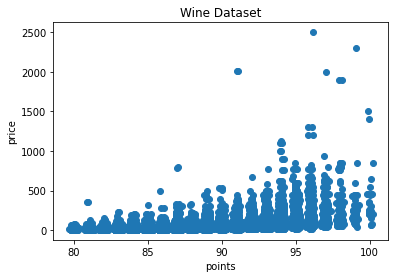

In [46]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.scatter(traincu['points'].to_array(), traincu['price'].to_array())
ax.set_title('Wine Dataset')
ax.set_xlabel('points')
ax.set_ylabel('price')

**Seperating price column from rest of the dataset**

In [42]:
y=traincu['price']
X=traincu.drop(['price','description'],axis=1)
ytest=testcu['price']
xtest=testcu.drop(['price','description'],axis=1)

**Splitting the dataset**

In [34]:
from cuml.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X, y, test_size=0.25, random_state=42)

In [35]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(131250, 7)
(131250,)
(43750, 7)
(43750,)


**Linear Regression using rapids with rmse score of 29.78**

In [41]:
linear=LinearRegression()
linear=linear.fit(X_train,Y_train)
linpred=linear.predict(X_test)
rmse=np.sqrt(mean_squared_error(Y_test,linpred))
print('The RMSE for the linear regression model is {}.'.format(rmse))

The RMSE for the linear regression model is 29.789631384390532.


**Random Forest Regression using rapids with rmse score of 15.50**

In [43]:
forest=RandomForestRegressor(n_estimators=800,max_depth=29,random_state=42)
forest=forest.fit(X_train,Y_train)
randpred=forest.predict(X_test)
rmse=np.sqrt(mean_squared_error(Y_test,randpred))
print('The RMSE for the random forest model is {}.'.format(rmse))

/opt/conda/lib/python3.7/site-packages/cuml/internals/api_decorators.py:794: UserWarning: For reproducible results in Random Forest Classifier or for almost reproducible results in Random Forest Regressor, n_streams==1 is recommended. If n_streams is > 1, results may vary due to stream/thread timing differences, even when random_state is set
  return func(**kwargs)
/opt/conda/lib/python3.7/site-packages/cuml/internals/api_decorators.py:567: UserWarning: To use pickling or GPU-based prediction first train using float32 data to fit the estimator
  ret_val = func(*args, **kwargs)
/opt/conda/lib/python3.7/site-packages/cuml/internals/api_decorators.py:586: UserWarning: GPU based predict only accepts np.float32 data. The model was trained on np.float64 data hence cannot use GPU-based prediction! 
Defaulting to CPU-based Prediction. 
To predict on float-64 data, set parameter predict_model = 'CPU'
  ret_val = func(*args, **kwargs)


The RMSE for the random forest model is 15.502575554420458.


**Defining the parameters for xgboost model**

In [47]:
params = {
    'max_depth':    8,
    'max_leaves':   2**8,
    'tree_method':  'gpu_hist',
    'objective':    'reg:squarederror',
    'grow_policy':  'lossguide',
    'eval_metric':  'rmse',
    'subsample':    '0.9'
}

**Creating Dmatrix and training model for xgboost**

In [67]:
dtrain=xgb.DMatrix(X_train,Y_train)
xgbmodel=xgb.train(params,dtrain,num_boost_round=100)

**Predicting testing data with xgboost model with rmse of 13.90**

In [68]:
dtest=xgb.DMatrix(X_test)
y_pred=xgbmodel.predict(dtest)
y_pred=y_pred.astype(float)
rmse=np.sqrt(mean_squared_error(Y_test,y_pred))
print('The RMSE for the XGBoost model is {}.'.format(rmse))

The RMSE for the XGBoost model is 13.905453539822805.


**Creating submission dataframe**

In [52]:
d_xtest=xgb.DMatrix(xtest)
y_pred_submit=xgbmodel.predict(d_xtest)
submit=cd.DataFrame({'price':y_pred_submit})

In [55]:
submit.size

83210

In [58]:
submit.index.name="id"

In [60]:
submit.to_csv("submission.csv")